In [2]:
#导入所需库文件
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#设置广告花费和点击量数据
money=np.array([[109],[82],[99], [72], [87], [78], [86], [84], [94], [57]]).astype(np.float32)
click=np.array([[11], [8], [8], [6],[ 7], [7], [7], [8], [9], [5]]).astype(np.float32)

#粗糙划分训练集和测试集数据
X_test = money[0:5].reshape(-1,1)
y_test = click[0:5]
X_train = money[5:].reshape(-1,1)
y_train = click[5:]

#设置自变量x的占位符,梯度下降时真实数据输入到模型的入口点
x=tf.placeholder(tf.float32,[None,1])
#设置斜率(权重值)W变量
W=tf.Variable(tf.zeros([1,1]))
#设置截距(偏置量)b变量
b=tf.Variable(tf.zeros([1]))

#设置线性模型y=Wx+b
y=tf.matmul(x,W)+b

#设置占位符用于输入实际的y值
y_=tf.placeholder(tf.float32,[None,1])

#设置成本函数(最小方差)
cost=tf.reduce_sum(tf.pow((y_-y),2))
#使用梯度下降，以0.000001的学习速率最小化成本函数cost，以获得W和b的值
train_step=tf.train.GradientDescentOptimizer(0.000001).minimize(cost)

#开始训练前对变量进行初始化
init=tf.global_variables_initializer()
#创建一个会话(Sess)
sess=tf.Session()
#在Sess中启用模型并初始化变量
sess.run(init)

#创建一个空list用于存放成本函数的变化
cost_history=[]

#循环训练模型100次
for i in range(100):
    feed={x:X_train,y_:y_train}
    sess.run(train_step,feed_dict=feed)
    #存储每次训练的cost值
    cost_history.append(sess.run(cost,feed_dict=feed))
    #输出每次训练后的W,b和cost值
    print("After %d iteration:" %i)
    print("W: %f" % sess.run(W))
    print("b: %f" % sess.run(b))
    print("cost: %f" % sess.run(cost,feed_dict=feed))
#输出最终的W,b和cost值
print("W_Value: %f" % sess.run(W),"b_Value: %f" % sess.run(b),"cost_Value: %f" % sess.run(cost,feed_dict=feed))



After 0 iteration:
W: 0.005902
b: 0.000072
cost: 234.297852
After 1 iteration:
W: 0.011419
b: 0.000139
cost: 204.850464
After 2 iteration:
W: 0.016576
b: 0.000202
cost: 179.120697
After 3 iteration:
W: 0.021396
b: 0.000261
cost: 156.639191
After 4 iteration:
W: 0.025902
b: 0.000316
cost: 136.995865
After 5 iteration:
W: 0.030114
b: 0.000367
cost: 119.832443
After 6 iteration:
W: 0.034051
b: 0.000415
cost: 104.835831
After 7 iteration:
W: 0.037731
b: 0.000460
cost: 91.732445
After 8 iteration:
W: 0.041171
b: 0.000502
cost: 80.283340
After 9 iteration:
W: 0.044387
b: 0.000541
cost: 70.279617
After 10 iteration:
W: 0.047392
b: 0.000578
cost: 61.538830
After 11 iteration:
W: 0.050202
b: 0.000612
cost: 53.901531
After 12 iteration:
W: 0.052828
b: 0.000644
cost: 47.228409
After 13 iteration:
W: 0.055283
b: 0.000674
cost: 41.397743
After 14 iteration:
W: 0.057578
b: 0.000701
cost: 36.303165
After 15 iteration:
W: 0.059723
b: 0.000727
cost: 31.851751
After 16 iteration:
W: 0.061728
b: 0.000752

In [3]:
#使用模型进行预测
sess.run(y, feed_dict={x: [[109]]})

array([[9.848552]], dtype=float32)

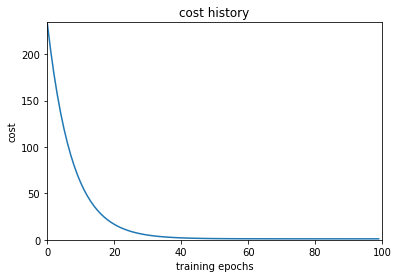

In [4]:
#绘制成本函数cost在100次训练中的变化情况
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,100,0,np.max(cost_history)])
plt.xlabel('training epochs')
plt.ylabel('cost')
plt.title('cost history')
plt.show()

In [5]:
#使用测试集计算模型的均方误差MSE
pred_y = sess.run(y, feed_dict={x: X_test})
mse = tf.reduce_mean(tf.square(pred_y - y_test))
print("MSE: %.4f" % sess.run(mse))

MSE: 0.7130


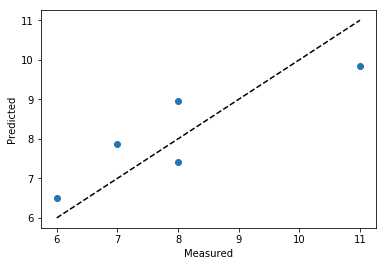

In [6]:
#绘制测试集真实点击量与预测点击量及学习回归线
fig, ax = plt.subplots()
ax.scatter(y_test, pred_y)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1.5)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()